# Prediction of Naver, Daum News classification


### Why ?
  
  - Can machine classify the news as the human do by reading the content of news?
  - Suppose on-job-situation that other team asked me to extract the keywords in each news category.
    1. Limitations : We only have news title and contents(no clue for news class)
    2. How about using machine-learning for these tasks? Once we make classificaiton model, then We can SAVE TIME!  

### Project's Goal

  - Train existing news from naver.com and automatically predicts new article's topics and fields from daum.net
  - News content(text) are the inputs, and output is the class of news (Politics, Economy, Society, Global, IT/Tech, Culture)
  
### How?

#### Data Collection

  - Crawl the news from(http://news.naver.com/), use them as Traing Data. And Predict Daum News class(http://media.daum.net/)
  - Use only news contents as X-feature, output(y-target) is class of news.

#### Methods of Analysis

  - Supervised Learining : TfidfVectorizer, CountVectorizer ==> Support Vector Machine Classifier('linear' kernel)
  - Vectorize text through TfidfVectorizer, CountVectorizer in Scikit-Learn packages.
  - Preprocessing target value y through LabelEncoder in Scikit-Learn packages.
  - Training already classifed 10831 naver news, then predict unlabled(but we know the answer) Daum news



## 1. Data Exploration

In [1]:
#-*- coding: utf-8 -*-
# Generate Data Frame

import pandas as pd

df_p = pd.read_csv('./navernews_politics.csv')     # 정치 뉴스 
df_e = pd.read_csv('./navernews_economy.csv')      # 경제
df_g = pd.read_csv('./navernews_global.csv')       # 국제
df_c = pd.read_csv('./navernews_culture.csv')      # 문화
df_i = pd.read_csv('./navernews_it.csv')           # it/기술
df_s = pd.read_csv('./navernews_society.csv')      # 사회

df_p.head()

,link,title,content,written_time,crawl_time
0,http://news.naver.com/main/hotissue/read.nhn?m...,[전문]야3당 발의 '대통령(박근혜)탄핵소추안',[이데일리 하지나 기자] 대통령(박근혜)탄핵소추안주 문 헌법 제65조 및 국회...,2016-12-02 15:22:00,2016-12-02 08:00:09
1,http://news.naver.com/main/hotissue/read.nhn?m...,"박 대통령 ""4월 퇴진, 6월 대선 수용하겠다"" <현장연결>","박 대통령 ""4월 퇴진, 6월 대선 수용하겠다"" <현장연결>연합뉴스TV : 02-3...",2016-12-06 16:33:00,2016-12-06 08:01:03
2,http://news.naver.com/main/hotissue/read.nhn?m...,"[탄핵 가결]與 비주류 ""대한민국 국민이 위대한 길 열었다""",새누리당 비상시국회의 대변인 역할을 하고 있는 황영철 의원이 21일 국회에서 박근혜...,2016-12-09 16:31:00,2016-12-09 08:00:08
3,http://news.naver.com/main/hotissue/read.nhn?m...,"국민의당 ""탄핵 가결, 끝이 아니라 시작이다""","[머니투데이 김세관 기자] [[the300]손금주 수석대변인 브리핑…""국민이 한 ...",2016-12-09 16:33:00,2016-12-09 08:00:08
4,http://news.naver.com/main/hotissue/read.nhn?m...,황교안 대통령 권한대행 대국민담화 전문,[머니투데이 세종=조성훈 기자] 황교안 국무총리가 9일 오후 서울 세종로 정부서울...,2016-12-09 20:15:00,2016-12-09 12:00:06


In [2]:
# Delete useless other columns except X(content), y(label) in each topics dataframe.

df_p.drop(['link', 'title', 'written_time', 'crawl_time'], axis=1, inplace=True)
df_e.drop(['link', 'title', 'written_time', 'crawl_time'], axis=1, inplace=True)
df_g.drop(['link', 'title', 'written_time', 'crawl_time'], axis=1, inplace=True)
df_c.drop(['link', 'title', 'written_time', 'crawl_time'], axis=1, inplace=True)
df_i.drop(['link', 'title', 'written_time', 'crawl_time'], axis=1, inplace=True)
df_s.drop(['link', 'title', 'written_time', 'crawl_time'], axis=1, inplace=True)

In [3]:
# eliminating the null value in each dataframes.

dfs_f = [df_p, df_e, df_g, df_c, df_i, df_s]
dfs = []

for df in dfs_f:
    df.dropna(inplace=True)  
    print len(df)
    dfs.append(df)


1992
2000
2000
1569
1272
1998


In [4]:
# Transform dataframe into pandas series for making iterable array.

df_ss = []

for df in dfs:
    df_s = pd.Series(df[df.columns[0]])
    df_ss.append(df_s)
    
print df_ss

[0       [이데일리 하지나 기자] 대통령(박근혜)탄핵소추안주    문 헌법 제65조 및 국회...
1       박 대통령 "4월 퇴진, 6월 대선 수용하겠다" <현장연결>연합뉴스TV : 02-3...
2       새누리당 비상시국회의 대변인 역할을 하고 있는 황영철 의원이 21일 국회에서 박근혜...
3       [머니투데이 김세관  기자] [[the300]손금주 수석대변인 브리핑…"국민이 한 ...
4       [머니투데이 세종=조성훈 기자]  황교안 국무총리가 9일 오후 서울 세종로 정부서울...
5       [이데일리 김영환 기자] 더불어민주당은 9일 박근혜 대통령에 대한 탄핵 소추안이 국...
6       박근혜 대통령(자료사진=뉴시스)[이데일리 강신우 기자] 박근혜 대통령은 29일 청와...
7       [연합뉴스TV제공]\n'민생예외' 입증 강화로 절충점 찾은듯한미일 독자제재도 뒤이어...
8       조사실 향하는 차은택\n    (서울=연합뉴스) 윤동진 기자 = '비선 실세' 의혹...
9       北 석탄값 급등…자금줄 차단 노력 '무위'(CG)유엔 안보리, 北 석탄 수출 제재 ...
10      "비박 입장도 봐야…2ㆍ9일 어느 쪽인지 아직 몰라"노회찬 "2일 처리돼야 박한철 ...
11      기자회견하는 차은택 변호사\n    (서울=연합뉴스) 윤동진 기자 = '문화계 황태...
12      최순실·차은택 등 '문화정책·예산 전횡' 남은 의혹 (서울=연합뉴스) 방현덕 기자 ...
13      (대구=연합뉴스) 김선형 기자 = 더불어민주당 김부겸 의원은 27일 박근혜 대통령을...
14      퇴진 스티커 붙이는 안철수\n    (광주=연합뉴스) 박철홍 기자 = 국민의당 안철...
15      (고양=연합뉴스) 최재훈 기자 = 안희정 충남도지사는 "박근혜 대통령은 이미 주권자...
16      野 지도부, 與비박계 9일 처리 뜻 밝히자 D-데이 고심 野내부 2일 처리 주장 여...
17      최순실→차

In [5]:
# Making a corpus about politics and use Twitter morphs Analyzer in konlpy.tag
from konlpy.utils import pprint
from konlpy.tag import Twitter

twitter = Twitter()
doc_ko = ""

# Put whole news content together for making politics corpus
for k in df_ss[0]:
    doc_ko += k.decode('utf-8')

# After forming corpus, extract noun token through Twitter Morphs Analyzer
tokens_ko = twitter.nouns(doc_ko)

In [6]:
# Setting before Visualization for each topic word frequency
from matplotlib import font_manager, rc
font_fname = '/Library/Fonts/AppleGothic.ttf'     # A font of your choice, Mac 용 폰트설정
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

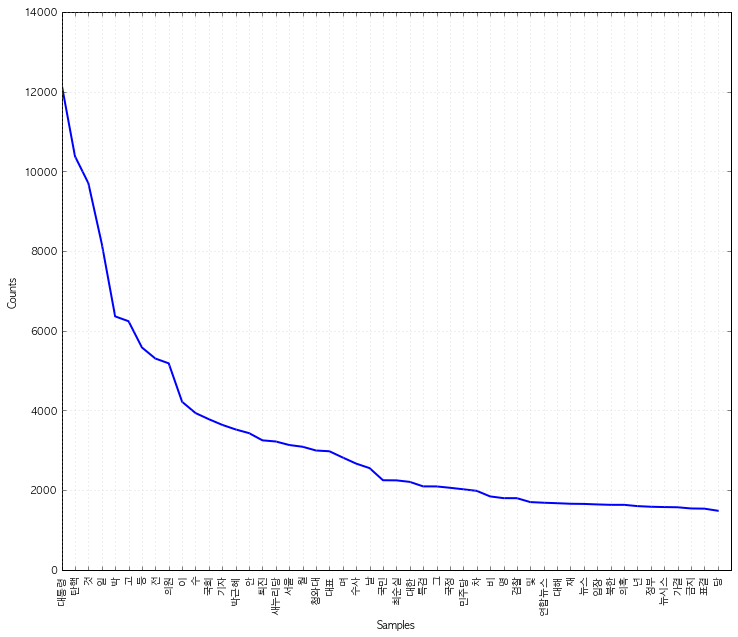

In [7]:
# Word frequency visualization in each corpus using nltk packages.
# Set X axis as Top 50 word frequency and plotting

import nltk
import matplotlib as mpl
import matplotlib.pylab as plt

text = nltk.Text(tokens_ko)
plt.figure(figsize=(12,10))
text.plot(50)
plt.show()

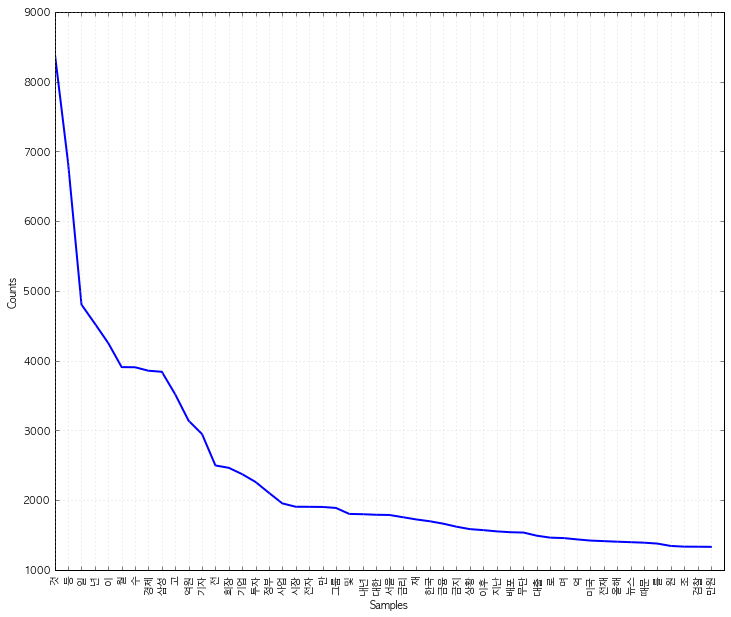

In [8]:
# Graphs for economy topic word frequency

import nltk
import matplotlib as mpl
import matplotlib.pylab as plt

doc_ko = ""

for k in df_ss[1]:
    doc_ko += k.decode('utf-8')
tokens_ko = twitter.nouns(doc_ko)

text = nltk.Text(tokens_ko)
plt.figure(figsize=(12,10))
text.plot(50)
plt.show()

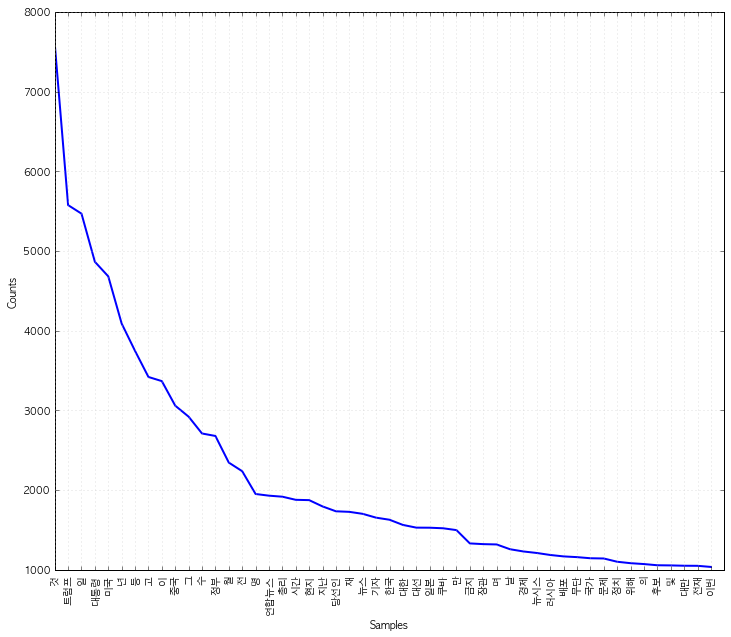

In [9]:
# Graphs for global topic word frequency

import nltk
import matplotlib as mpl
import matplotlib.pylab as plt

doc_ko = ""

for k in df_ss[2]:
    doc_ko += k.decode('utf-8')
tokens_ko = twitter.nouns(doc_ko)

text = nltk.Text(tokens_ko)
plt.figure(figsize=(12,10))
text.plot(50)
plt.show()

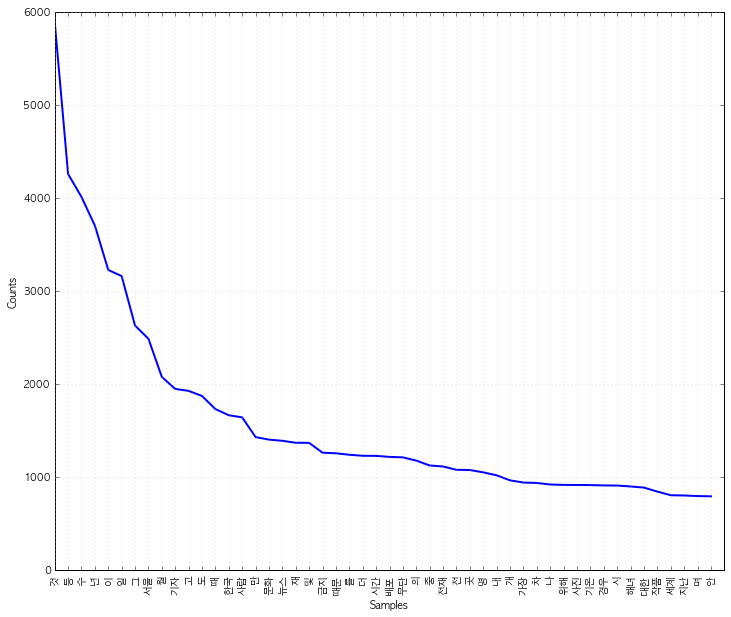

In [10]:
# Graphs for culture topic word frequency

import nltk
import matplotlib as mpl
import matplotlib.pylab as plt

doc_ko = ""

for k in df_ss[3]:
    doc_ko += k.decode('utf-8')
tokens_ko = twitter.nouns(doc_ko)

text = nltk.Text(tokens_ko)
plt.figure(figsize=(12,10))
text.plot(50)
plt.show()

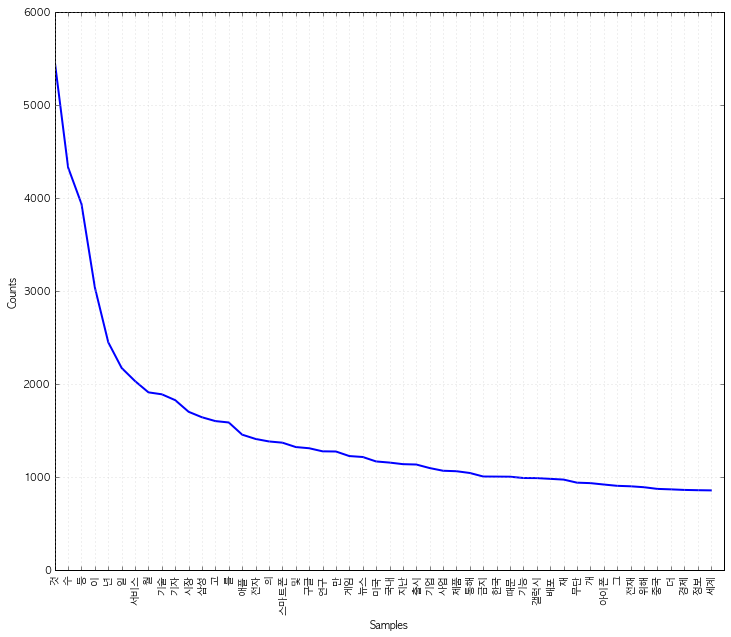

In [11]:
# Graphs for IT topic word frequency

import nltk
import matplotlib as mpl
import matplotlib.pylab as plt

doc_ko = ""

for k in df_ss[4]:
    doc_ko += k.decode('utf-8')
tokens_ko = twitter.nouns(doc_ko)

text = nltk.Text(tokens_ko)
plt.figure(figsize=(12,10))
text.plot(50)
plt.show()

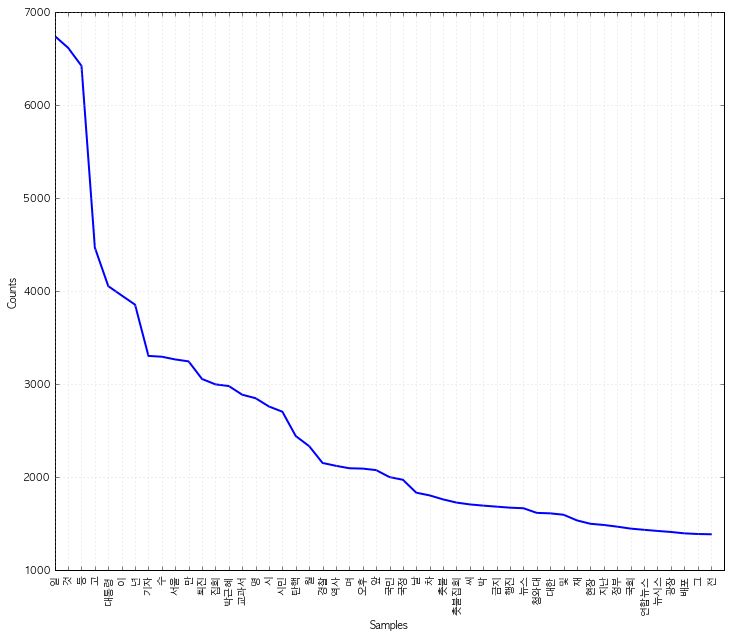

In [12]:
# Graphs for Society topic word frequency

import nltk
import matplotlib as mpl
import matplotlib.pylab as plt

doc_ko = ""

for k in df_ss[5]:
    doc_ko += k.decode('utf-8')
tokens_ko = twitter.nouns(doc_ko)

text = nltk.Text(tokens_ko)
plt.figure(figsize=(12,10))
text.plot(50)
plt.show()

## 2. Data Preprocessing

In [13]:
# Create Traing Dataset which contains whole news content

df = pd.read_csv('./navernews_category.csv')

df.drop(['link', 'title', 'written_time', 'crawl_time'], axis=1, inplace=True)

df.head()

,content,label
0,[이데일리 하지나 기자] 대통령(박근혜)탄핵소추안주 문 헌법 제65조 및 국회...,politics
1,"박 대통령 ""4월 퇴진, 6월 대선 수용하겠다"" <현장연결>연합뉴스TV : 02-3...",politics
2,새누리당 비상시국회의 대변인 역할을 하고 있는 황영철 의원이 21일 국회에서 박근혜...,politics
3,"[머니투데이 김세관 기자] [[the300]손금주 수석대변인 브리핑…""국민이 한 ...",politics
4,[머니투데이 세종=조성훈 기자] 황교안 국무총리가 9일 오후 서울 세종로 정부서울...,politics


In [14]:
# Drop the row of null data 
df[df.content.isnull() == True]
df.dropna(inplace=True)
print df[df.content.isnull() == True].count()
print len(df)

content    0
label      0
dtype: int64
10831


In [15]:
# Twitter konlpy.tag 형태소 분석기 twitter 사용

from konlpy.tag import Twitter
from konlpy.tag import Kkma

pos_tagger = Twitter()
pos_tagger2 = Kkma()


# function that loading stopwords list
def get_stop_words():
    result = set()
    for line in open('./stopwords-kr.txt','r').readlines():
        result.add(line.strip())
    return result

# making tokenizing function
def tokenize_pos(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [16]:
# Separating the X, y data in Training set

X = df['content']
y = df['label']

In [17]:
X.tail()

10837    아베 신조 일본 총리(자료사진) © AFP=뉴스1자민당 총재 임기 연장에 '최장수 ...
10838    좌파 성향의 반(反)기성 정당으로 최대 야당인 오성운동(M5S)과 베페 그릴로 대표...
10839    지진 발생 이전 코끼리 모양을 나타내는 '코끼리 바위' (사진출처=인스타그램)© N...
10840    5일(현지시간) 푸미폰 아둔야뎃 선왕 탄신일을 맞아 방콕 푸미폰 다리에서 한 여성이...
10841    도널드 트럼프 미국 대통령 당선자의 딸 이반카 트럼프가 17일 (현지시간) 뉴욕의 ...
Name: content, dtype: object

In [18]:
y.tail()

10837    global
10838    global
10839    global
10840    global
10841    global
Name: label, dtype: object

In [19]:
# Categorize y(label) value through LabelEncoder in Scikit-Learn preprocessing packages

from sklearn.preprocessing import LabelEncoder
from konlpy.utils import pprint

le = LabelEncoder()
le.fit(y)
le.classes_

array(['culture', 'economy', 'global', 'it', 'politics', 'society'], dtype=object)

In [20]:
# Transforming y
y = le.fit_transform(y)
y

array([4, 4, 4, ..., 2, 2, 2])

In [21]:
# Split the dataframe into train and test set 3 : 1

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=8000, test_size=2831)
len(X_train), len(X_test)

(8000, 2831)

In [22]:
X_train.head()

8356     애플, 결함에도 늦장·차별 대응…삼성, 성급한 리콜·새제품 출시, 회수율 50% '...
837      【서울=뉴시스】김혜경 기자 = 일본 정부는 내일 국가안전보장회의(NSC)를 열고 핵...
10200    ['디젤게이트' 1년 만에… 환경부·국토부 "리콜 계획서 곧 승인"] 배출가스 장치...
8278     <아이뉴스24>[김국배기자] 마이크로소프트(MS)가 오픈소스 생태계에 대한 지원을 ...
6287     【서울=뉴시스】고승민 기자 = 이영 교육부 차관이 1일 오후 서울 종로구 정부서울청...
Name: content, dtype: object

In [23]:
y_train[0:5]

array([3, 4, 2, 3, 5])

## 3. Modeling and Cross Validation

In [24]:
# Import preprocessing packages and classifier Before modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

In [25]:
# Vectorize News content (CountVectorizer)

clf_1 = Pipeline([('vect', CountVectorizer())])
features = clf_1.fit_transform(X_train)
cross_val_score(MultinomialNB(),features, y_train)

array([ 0.85724991,  0.86084021,  0.87617261])

In [26]:
# Use Multinomial NaiveBayes Classifier, Evaluate performance of classification model
clf_1 = Pipeline([('countvect', CountVectorizer()),
                  ('clf', MultinomialNB(alpha=0.5))])

clf_1.fit(X_train, y_train)

print(classification_report(y_test, clf_1.predict(X_test), target_names=['culture', 'economy', 'global', 'it', 'politics', 'society']))

             precision    recall  f1-score   support

    culture       0.86      0.86      0.86       413
    economy       0.86      0.89      0.88       547
     global       0.93      0.88      0.90       533
         it       0.90      0.88      0.89       320
   politics       0.86      0.90      0.88       510
    society       0.88      0.86      0.87       508

avg / total       0.88      0.88      0.88      2831



In [41]:
# Evaluation for LogisticRegression Classifier

clf_2 = Pipeline([('countvect', CountVectorizer()),
                  ('clf', LogisticRegression())])
clf_2.fit(X_train, y_train)
print(classification_report(y_test, clf_2.predict(X_test), target_names=['culture', 'economy', 'global', 'it', 'politics', 'society']))

             precision    recall  f1-score   support

          0       0.89      0.87      0.88       418
          1       0.89      0.87      0.88       520
          2       0.92      0.93      0.92       527
          3       0.92      0.89      0.90       344
          4       0.89      0.86      0.88       547
          5       0.81      0.88      0.84       475

avg / total       0.89      0.88      0.88      2831



In [42]:
# Evaluation for Linear Support Vector Machine (SVC) Classifier

clf_3 = Pipeline([('countvect', CountVectorizer()),
                  ('clf', SVC(kernel='linear'))])
clf_3.fit(X_train, y_train)
print(classification_report(y_test, clf_3.predict(X_test), target_names=['culture', 'economy', 'global', 'it', 'politics', 'society']))

             precision    recall  f1-score   support

          0       0.86      0.83      0.85       418
          1       0.85      0.84      0.84       520
          2       0.90      0.92      0.91       527
          3       0.89      0.85      0.87       344
          4       0.85      0.84      0.85       547
          5       0.79      0.84      0.81       475

avg / total       0.86      0.85      0.85      2831



In [79]:
# Repeating former process with TfidfVectorizer


clf_5 = Pipeline([('Tfidf', TfidfVectorizer()),
                  ('clf', MultinomialNB(alpha=0.5))])
clf_5.fit(X_train, y_train)
print(classification_report(y_test, clf_5.predict(X_test), target_names=['culture', 'economy', 'global', 'it', 'politics', 'society']))

             precision    recall  f1-score   support

          0       0.94      0.59      0.72       417
          1       0.75      0.87      0.81       534
          2       0.87      0.85      0.86       553
          3       0.96      0.69      0.80       331
          4       0.74      0.90      0.81       510
          5       0.72      0.83      0.77       486

avg / total       0.82      0.80      0.80      2831



In [80]:
# TfidfVectorizer, LogisticRegression

clf_6 = Pipeline([('Tfidf', TfidfVectorizer()),
                  ('clf', LogisticRegression())])
clf_6.fit(X_train, y_train)
print(classification_report(y_test, clf_6.predict(X_test)))

             precision    recall  f1-score   support

          0       0.85      0.88      0.86       417
          1       0.86      0.88      0.87       534
          2       0.91      0.92      0.91       553
          3       0.95      0.84      0.89       331
          4       0.89      0.87      0.88       510
          5       0.82      0.86      0.84       486

avg / total       0.88      0.88      0.88      2831



In [20]:
# Add Twiiter Morphs Analyzer's noun token, stopwords list with SVC model

clf_8 = Pipeline([('Tfidf', TfidfVectorizer(tokenizer=pos_tagger.pos, stop_words=get_stop_words())),
                  ('clf', SVC(kernel='linear'))])
clf_8.fit(X_train, y_train)

print(classification_report(y_test, clf_8.predict(X_test), target_names=['culture', 'economy', 'global', 'it', 'politics', 'society']))

             precision    recall  f1-score   support

    culture       0.88      0.93      0.90       415
    economy       0.90      0.92      0.91       544
     global       0.94      0.93      0.93       488
         it       0.94      0.91      0.93       338
   politics       0.94      0.87      0.90       554
    society       0.86      0.91      0.89       492

avg / total       0.91      0.91      0.91      2831



In [17]:
# Classification report for Ensemble RandomForest Classifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(TfidfVectorizer(),
                         FunctionTransformer(lambda x: x.todense(), accept_sparse=True),
                         RandomForestClassifier())
pipeline.fit(X_train, y_train)

print(classification_report(y_test, pipeline.predict(X_test), target_names=['culture', 'economy', 'global', 'it', 'politics', 'society']))

             precision    recall  f1-score   support

          0       0.66      0.70      0.68       370
          1       0.59      0.74      0.66       505
          2       0.78      0.81      0.80       519
          3       0.84      0.56      0.67       350
          4       0.75      0.79      0.76       512
          5       0.74      0.63      0.68       575

avg / total       0.72      0.71      0.71      2831



## 4. Final Test
### Predict News Category Classification Based On Daum News - clf_8 model(Tfidf, Linear SVC)

In [21]:
# Final Test set Data Frame

df_t = pd.read_csv('./daumnews_test.csv')

df_t.drop(['link', 'title'], axis=1, inplace=True)
df_t.head(10)

,content,label
0,박근혜 대통령이 헌법제판소에 제출한 답변서에서 ‘최순실 국정농단’을 부정하며 “대통...,society
1,국정농단의 핵심인물 최순실씨 등 피고인들에 대한 재판이 19일 시작된다. 그간 국정...,society
2,[앵커]\n촛불집회가 계속될수록 시민들이 한목소리로 외치는 구호도 점차 진화하고 있...,society
3,"추운 날씨, 피로감 등에도…주최 측 ""상당히 많이 참가""\n""탄핵 이유 없다"" 헌재...",society
4,프랑스에서 2001년 만들어진 영화 ‘탕기(Tanguy)’를 아시나요?\n\n독립할...,society
5,"청와대는 오늘(16일), 논란이 되는 ‘한 가지 의혹’에 대해 '사실무근'이라고 부...",society
6,사육해온 황새 2마리가 잇따라 폐사하며 임시휴원에 들어간 경기도 과천시 서울대공원 ...,society
7,박사모 등 탄핵 반대 단체들도 '맞불집회' 계속\n(서울=연합뉴스) 안홍석 기자 =...,society
8,"232만→104만→77만, 시위대 숫자 줄지만 정국 상황따라 언제든 타오를 가능성\...",society
9,도시민박 창업 서울송파 정신옥씨\n“도시민박을 통해 젊음과 경제적 능력을 동시에 얻...,society


In [22]:
# Set X, y data

X_new_test = df_t['content']
y_new_test = pd.Series(df_t['label'])

In [23]:
# Categorize y value

le.fit(y_new_test)

le.classes_

array(['culture', 'economy', 'global', 'it', 'politics', 'society'], dtype=object)

In [24]:
# Transform y

y_new_test = le.fit_transform(y_new_test)

In [25]:
# The answer for final test set

y_new_test

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [26]:
# Prediction by model

clf_8.predict(X_new_test)

array([4, 4, 5, 5, 0, 4, 5, 5, 5, 0, 1, 4, 5, 5, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       5, 4, 5, 4, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 5, 3, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3])

In [27]:
# Performance Report for Final test

print(classification_report(y_new_test, clf_8.predict(X_new_test), target_names=['culture', 'economy', 'global', 'it', 'politics', 'society']))

             precision    recall  f1-score   support

    culture       0.83      1.00      0.91        15
    economy       0.86      0.80      0.83        15
     global       0.93      0.93      0.93        15
         it       0.81      0.87      0.84        15
   politics       0.73      0.73      0.73        15
    society       0.64      0.50      0.56        14

avg / total       0.80      0.81      0.80        89



## 5. Results and Conclusion


### Results

- 1. Traing 10831 Naver news, model performance scored 0.91
    - preprocessing by TF-idf, SVC model

- 2. Final Test with Daum News(90 articles)
    - 15 articles per each topics(6 topics, 90 articles)
    - Model scored 81% point of performance.

### Conclusion 

- Analysis
    - Crawled between end of November and middle of December(relatively recent), some keywords concentrated 
    - Politics : 최순실, 대통령, 탄핵, 새누리당, 박근혜  ⇒ Mainly related by impeachment of korean president
     - economy : 삼성, 회장, 기업, 금리, 금융 ⇒ Corresponds to Mrs.Choi's Case, presidents and ceo of big company
     - society : 대통령, 퇴진, 집회, 교과서, 촛불집회 ⇒ Keywords that closely related to Candle Rally
     - global  : 트럼프, 미국, 중국, 러시아, 대만 ⇒ Mainly about Donald Trump's actions and comments
     - culture : 서울, 기온 ⇒ Frequently weather news
      -  IT    : 삼성, 애플, 스마트폰, 구글, 아이폰, 갤럭시 ⇒ Mainly about smartphone, samsung, apple, iphone

- Problems
     - Its performance for other times news which have diffent main keywords is somewhat low
           e.g) news about 'Thaad' in 2016 Jan. ==> predict global category
     - Society category performance are 50% ⇒ Difficulty with extraction of keywords that can tell from other news
     - There are various keywords in accordance with trend and issue, so we need huge amount of data.

- Future plans
    - Proceed Analysis with whole news data in 2016
    - Analyze with similarities(cosine similarity) among other news
    - Using topic modeling in Python genism
       - LDA(Latent Dirichlet Allocation) model use